## Decision Tree Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools, AllChem as Chem, Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import rdMolDescriptors
import sklearn
import pickle as pkl
import numpy as np
import seaborn as sns
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [2]:
Chembl_df = pkl.load(open('datasets/Chembl_df.p', 'rb'))

In [3]:
Chembl_df

,ChEMBL ID,Smiles,Morgan3,Classes,Mols
0,CHEMBL4647763,O=C(Nc1ccc2ncccc2c1)c1ccccc1O,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CHEMBL4744780,Cc1cc(OCc2ccccn2)c2cccc(O)c2n1,"[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,CHEMBL4638554,O=C(O)c1cccc(COc2ccccc2)c1,"[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CHEMBL4763518,C=C(C)[C@H]1CC[C@H](C)[C@H]2CCC(C(=O)O)=C[C@H]12,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,CHEMBL4744827,Fc1ncccc1-c1cnc2c3ccccc3nn2c1,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...,...
1808,CHEMBL4440759,CC1=C(C=O)[C@@]2(C)CCCC(C)(C)[C@@H]2C[C@@H]1O,"[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"<img data-content=""rdkit/molecule"" src=""data:i..."
1809,CHEMBL4541388,N#Cc1ccc(CCc2cccc(C#N)c2)cc1,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"<img data-content=""rdkit/molecule"" src=""data:i..."
1810,CHEMBL4752508,CCCC/C=C/Cc1cc(=O)c2ccccc2n1C,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"<img data-content=""rdkit/molecule"" src=""data:i..."
1811,CHEMBL4799877,CC(C)(C)Nc1cc(NC(C)(C)C)n2nccc2n1,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [4]:
smi = Chembl_df['Smiles']

In [5]:
Mol = []
for x in smi:
    mol = Chem.MolFromSmiles(x)
    Mol.append(mol)

In [6]:
y = list(Chembl_df['Classes'])

In [7]:
fmorgan3 = list(Chembl_df['Morgan3'])

## Creating DecisionTree, Overtraining Plot & Feature Importances

[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [8]:
#creating DecisionTrees with different depths & feature importances
#automated prediction and visualisation of cohens kappa
# x = Morgan Fingerprints, y = Classes, r = radius of Morgan Fingerprints, mols = List of mols

def DecisionTree(x, y, r, mols): 
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, train_size = 0.80, random_state=42, stratify =y )
    coh_kappa_test = []
    coh_kappa_train = []
    depths = list(range(1,100,5))
    for ix in depths:
   
        clf = sklearn.tree.DecisionTreeClassifier(max_depth = ix, random_state=42)
        clf.fit(x_train, y_train)
        y_test_pred = clf.predict(x_test, check_input = True)
        y_train_pred =  clf.predict(x_train, check_input = True)
        kappa_test = sklearn.metrics.cohen_kappa_score(y_test, y_test_pred)
        kappa_train = sklearn.metrics.cohen_kappa_score(y_train, y_train_pred)
        coh_kappa_test.append(kappa_test)
        coh_kappa_train.append(kappa_train)
       
        
    #Overtraining Plot
    fig, ax1 = plt.subplots()
    ax1.plot(depths, coh_kappa_test, label = 'Validation Data')
    ax1.plot(depths, coh_kappa_train, label = 'Training Data')
    ax1.set_xlabel('Depth')
    ax1.set_ylabel('Cohens Kappa')
    ax1.legend()
    ax1.set_title('Overtraining Plot')    
    print(f'Max Cohens Kappa = {np.max(coh_kappa_test)}')
    i_maximum = np.argmax(coh_kappa_test)
    best_depth = depths[i_maximum]
    print(f'Best Depth = {depths[i_maximum]}')
    
    #feature_importances
    fig, ax2 = plt.subplots()
    ax2.set_title('Feature Importances')  
    clf_best_depth = sklearn.tree.DecisionTreeClassifier(max_depth = best_depth, random_state=42)
    clf_best_depth.fit(x_train, y_train)
    importances = clf_best_depth.feature_importances_

    ax2.plot(range(len(importances)), importances)
    vib = importances.argsort()[-10:][::-1]
    print(f'Important Features = {vib}')
    moi = []
    double =[]
    for mol in mols:
        bi ={}
        rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=r, bitInfo=bi, nBits=4096, useFeatures=True)
        for b in vib:
            if b in bi.keys() and b not in double:
                double.append(b)
                moi.append((mol, b, bi))
    return Chem.Draw.DrawMorganBits(moi[:12], molsPerRow=4, legends=[f'{tupl[1]}' for tupl in moi][:12])

## Visualisation 

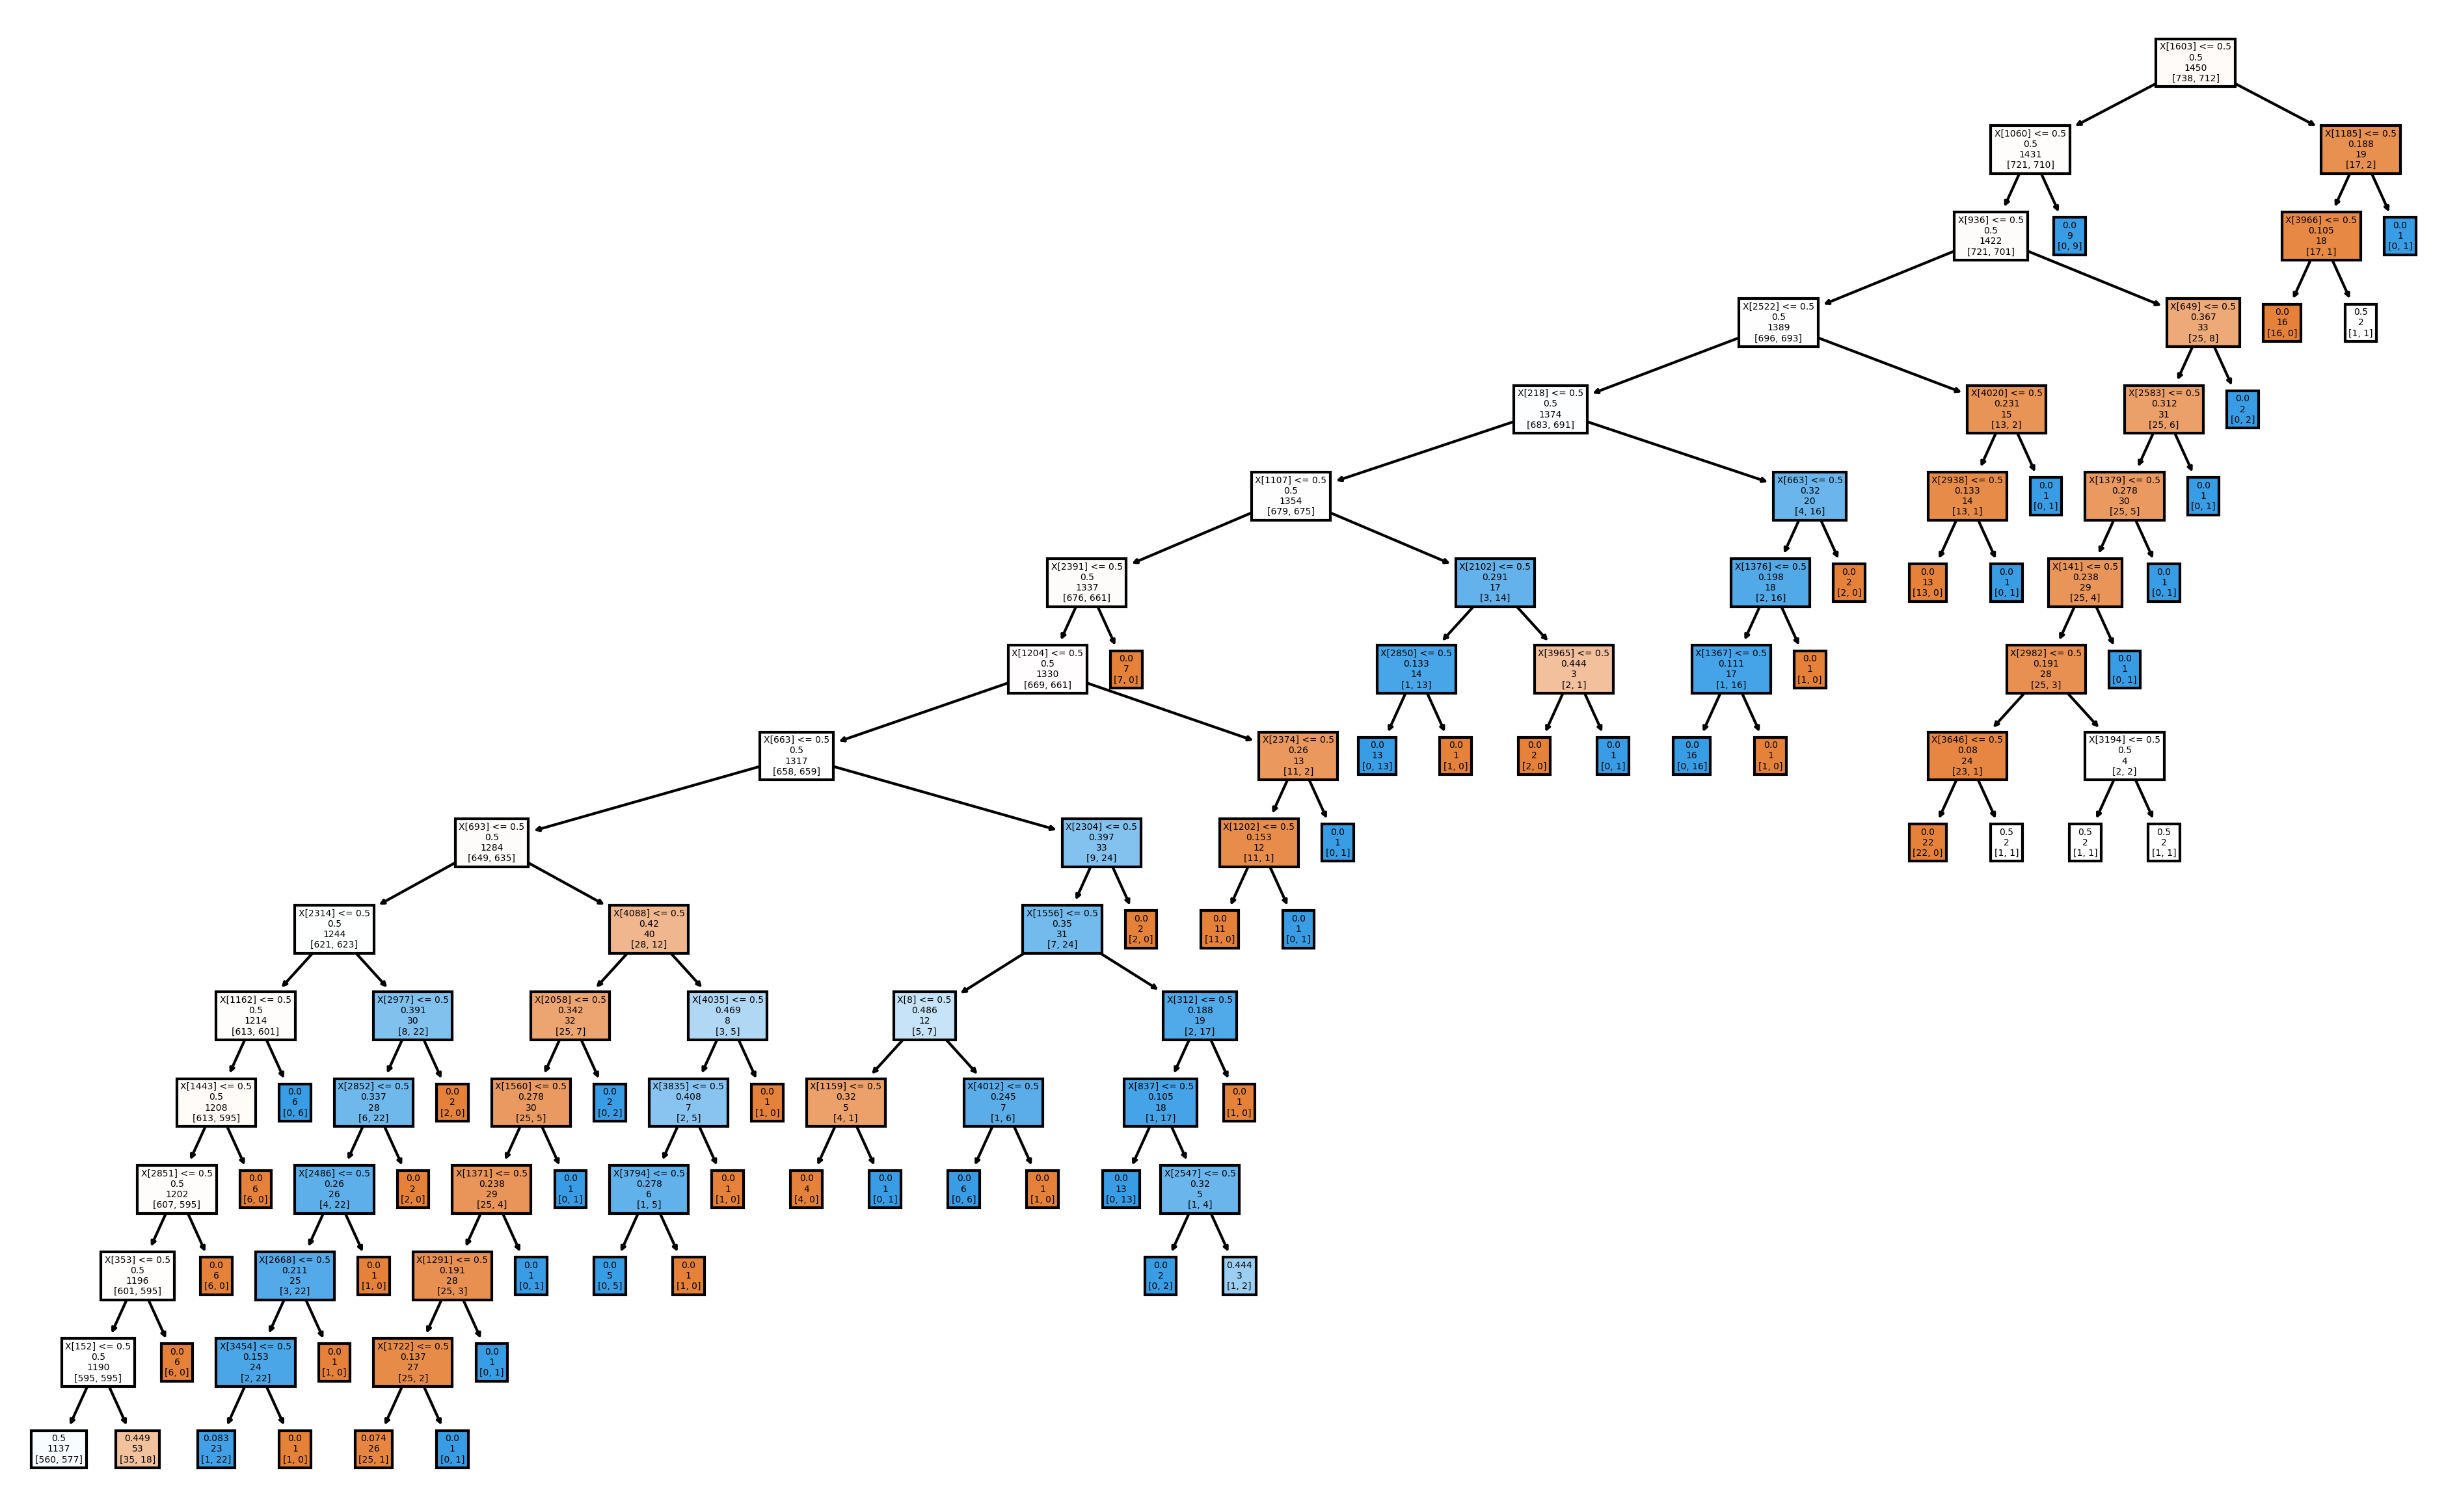

In [9]:
#split dataset in atrain and test data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(fmorgan3, y, test_size = 0.20, train_size = 0.80, random_state=42, stratify =y )
#creating a decision tree classifier
clf = sklearn.tree.DecisionTreeClassifier(max_depth = 16, random_state=42)

#train the decision tree classifier
clf.fit(x_train,y_train)

#Decision Tree classifier visualisation
fig, ax = plt.subplots(figsize=(16,10), dpi=300)
sklearn.tree.plot_tree(clf, label = all, filled=True)
plt.show(clf)

## Overtraining Plot

![OTP](pictures/overtrainingsplot.jpg)

[Source](https://datacadamia.com/data_mining/overfitting)

## Overtraining Plot & Feature Importances from Dataset

Max Cohens Kappa = 0.0933654239135372
Best Depth = 86
Important Features = [1395 2040 1603 2058 1060  936 3970 2352 2522 1092]


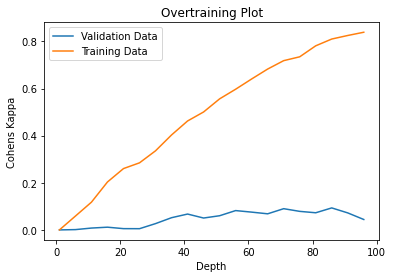

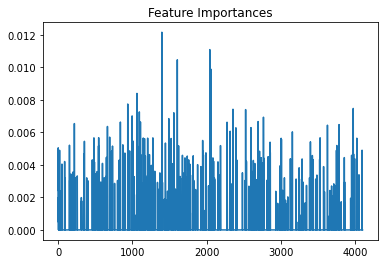

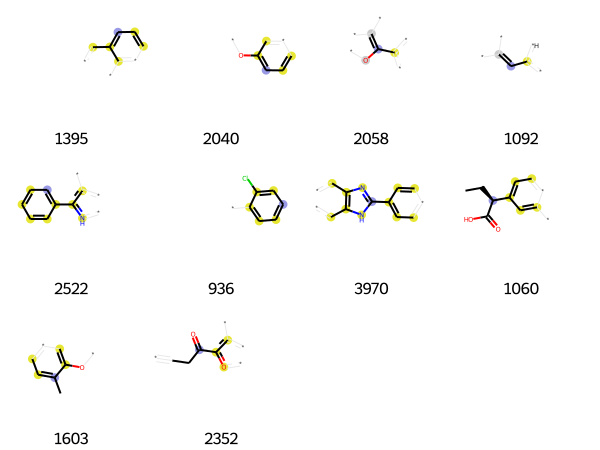

In [10]:
mols2 = DecisionTree(fmorgan3, y, 3, Mol)
plt.show()
mols2